In [24]:
import pandas as pd

In [25]:
pd.get_option("display.max_rows")

2000

I would like to be able to browse the pairs of synsets for exploration. Need to increase maximum rows for scrolling.

In [26]:
pd.set_option("display.max_rows", 2000)

## Similarity/Loss Between True and Predicted Synsets

In [27]:
df = pd.read_json(
    'https://raw.githubusercontent.com/gerberl/emoji2sense_nextpaper/master/wordnet-distance-as-loss/emoji_synsets_results.json', 
    lines=True, orient='records'
)

My assumption is that we have a list of pairs for true and predicted target sense.

In [28]:
df.columns = ['y_true', 'y_pred']
df

,y_true,y_pred
0,affection.n.01,celebration.n.01
1,affection.n.01,joy.n.01
2,friendliness.n.02,congratulation.n.02
3,admiration.n.03,hopefulness.n.02
4,love.v.03,friendliness.n.01
5,adoration.n.02,sarcasm.n.01
6,admiration.n.03,hopeless.a.01
7,love.n.01,hopefulness.n.02
8,love.n.01,embarrassment.n.01
9,admiration.n.03,hopefulness.n.02


In [29]:
# https://www.nltk.org/howto/wordnet.html
from nltk.corpus import wordnet as wn

The column `sim` will contain the [path similarity](https://www.nltk.org/howto/wordnet.html) between true and predicted target senses. The range is $[0,1]$, which `1` being identity (i.e., two identical synsets).

In [30]:
df['sim'] = df.apply(lambda x: wn.synset(x['y_true']).path_similarity(wn.synset(x['y_pred'])), axis='columns')

For some pairs it does not find any possible path. I have noticed that this happened for pairs belonging to different classes (e.g., noun against adjective). At some point, I could try using derived forms or the like - for the moment, I will drop them from further exploration.

In [31]:
path_sim_df = df.loc[ df['sim'].notnull() ]

In [32]:
path_sim_df.describe()

,sim
count,1309.000000
mean,0.133027
std,0.129814
min,0.055556
25%,0.083333
50%,0.100000
75%,0.142857
max,1.000000


In [33]:
path_sim_df = path_sim_df.sort_values('sim')

Firstly, the most dissimilar:

In [48]:
path_sim_df.head(30)

,y_true,y_pred,sim
1497,disappointment.n.01,tidal_bore.n.01,0.055556
1678,frustration.n.01,solicitation.n.03,0.058824
1687,admiration.n.03,disappointment.n.01,0.058824
662,admiration.n.03,mourning.n.01,0.058824
1405,chastise.v.01,solicitation.n.03,0.058824
675,admiration.n.03,mourning.n.01,0.058824
1421,displeasure.n.01,tidal_bore.n.01,0.058824
949,frustration.n.01,solicitation.n.03,0.058824
1079,chastise.v.01,solicitation.n.03,0.058824
876,frustration.n.01,solicitation.n.03,0.058824


In [46]:
wn.synset('solicitation.n.03').definition(), wn.synset('solicitation.n.03').lemmas(), wn.synset('solicitation.n.03').examples()

('the act of enticing a person to do something wrong (as an offer of sex in return for money)',
 [Lemma('solicitation.n.03.solicitation'),
  Lemma('solicitation.n.03.allurement')],
 [])

The most similar, apart from identity.

In [47]:
path_sim_df.loc[ path_sim_df['sim']<1 ].tail(30)

,y_true,y_pred,sim
583,affection.n.01,surprise.n.01,0.250000
1707,gratitude.n.01,enjoyment.n.01,0.250000
1450,sadness.n.01,grief.n.01,0.333333
296,happiness.n.02,satisfaction.n.01,0.333333
383,love.n.01,joy.n.01,0.333333
291,happiness.n.02,satisfaction.n.01,0.333333
47,affection.n.01,sex.n.03,0.333333
1399,disgust.n.01,disapproval.n.01,0.333333
789,admiration.n.01,captivation.n.02,0.333333
401,love.v.01,hopeless.a.01,0.333333


There seem to be quite a few `solicitation.n.03` predicted?

In [44]:
path_sim_df['y_true'].value_counts().head(20)

love.n.01              87
admiration.n.03        77
affection.n.01         56
happiness.n.02         52
gratitude.n.01         39
exhilaration.n.01      36
disappointment.n.01    31
happiness.n.01         28
anticipation.n.01      26
frustration.n.01       26
love.v.03              25
sadness.n.01           25
congratulation.n.01    24
worship.n.02           24
love.v.01              22
displeasure.n.01       20
annoyance.n.04         20
contentment.n.01       18
longing.n.01           17
appreciation.n.03      17
Name: y_true, dtype: int64

In [45]:
path_sim_df['y_pred'].value_counts().head(20)

solicitation.n.03      270
celebration.n.01       121
heart.n.07             102
congratulation.n.02     99
surprise.n.01           67
hopefulness.n.02        59
sarcasm.n.01            57
grief.n.01              52
satisfaction.n.01       46
disappointment.n.01     40
mourning.n.01           36
optimism.n.01           31
embarrassment.n.01      21
curiosity.n.01          18
worship.n.02            16
tidal_bore.n.01         16
pleasure.n.01           15
enjoyment.n.01          15
captivation.n.02        15
anxiety.n.02            12
Name: y_pred, dtype: int64

Bear in mind that path similarity is a **score**, not a **loss**. In other words, greater is better. Could easily change this by taking its complement (e.g., $1-sim$) or reversing the polarity.

As I seem to have removed entries that are possibly not connected by a path, I could have a look at another similarity/distance measure.

In [ ]:
path_sim_df['lch_sim'] = path_sim_df.apply(lambda x: wn.synset(x['y_true']).lch_similarity(wn.synset(x['y_pred'])), axis='columns')

Nah, it didn't work - `Computing the lch similarity requires Synset('chastise.v.01') and Synset('solicitation.n.03') to have the same part of speech.`. Never mind.

Let us have a look at the distribution of the similarity scores:

In [56]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
sns.set(style="ticks", color_codes=True)
sns.set_context("notebook")
# sns.set_context("talk")

In [57]:
%config InlineBackend.figure_format = 'retina'

In [58]:
sns.set({ "figure.figsize": (12, 8) })

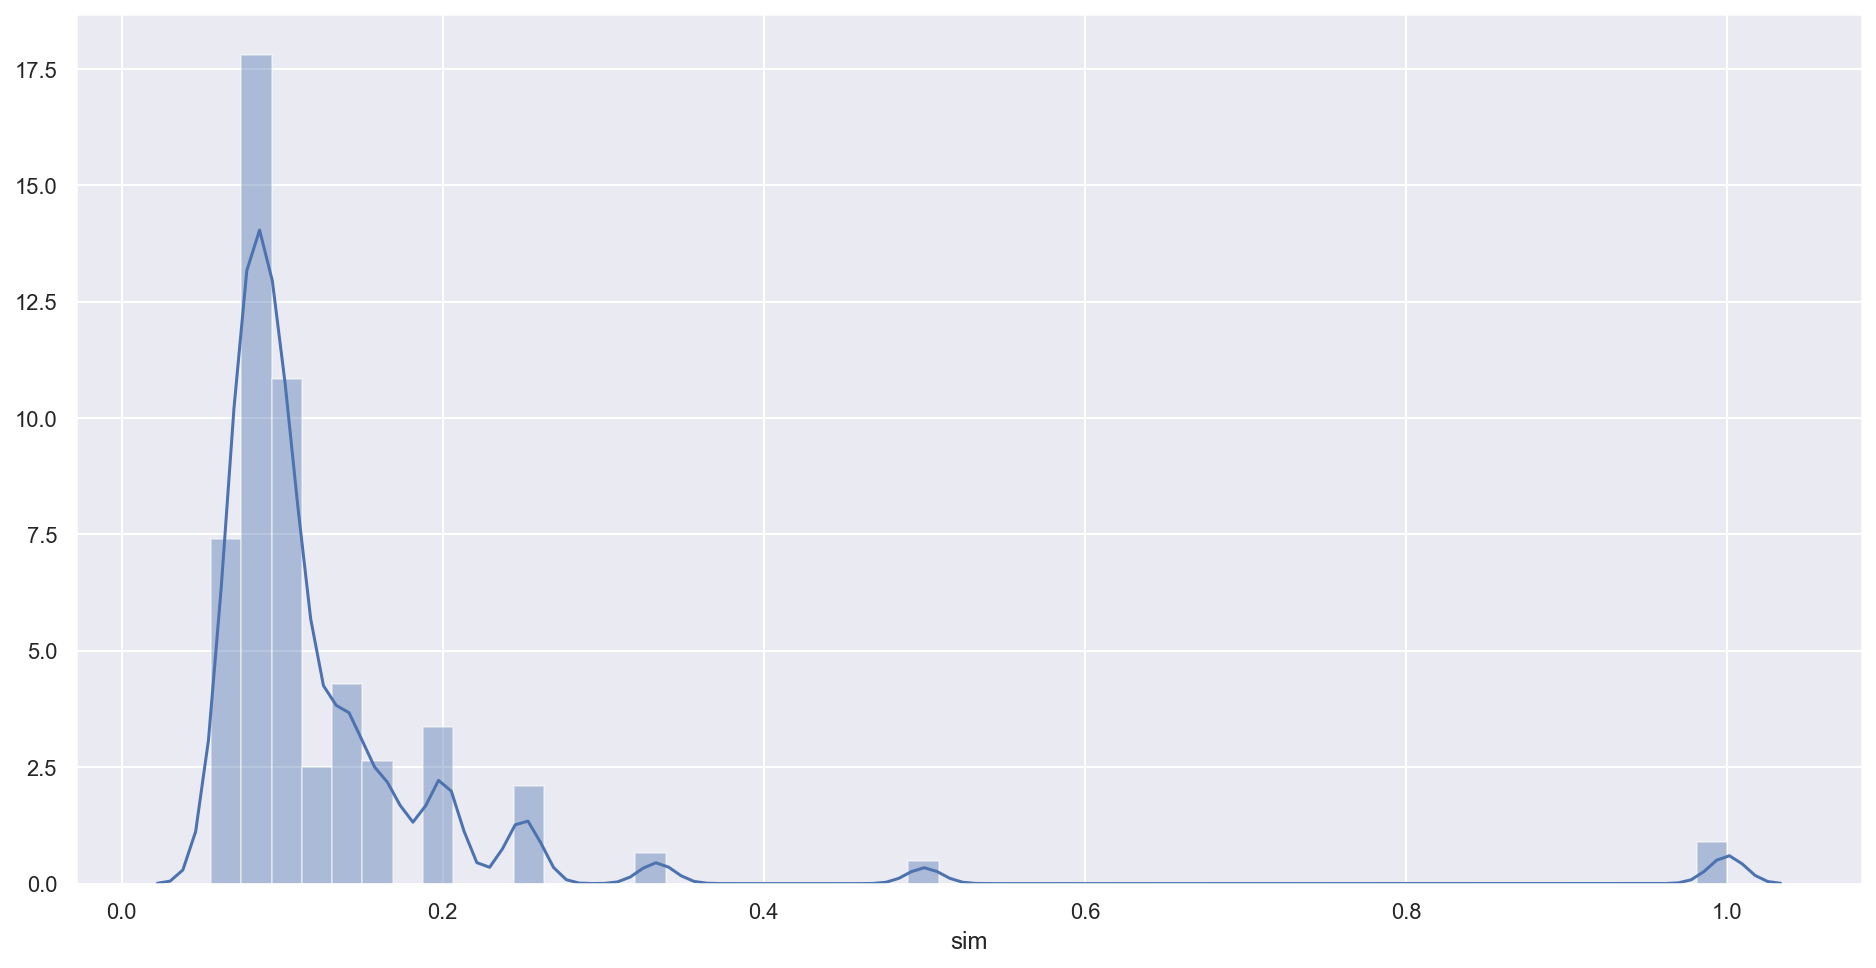

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(16,8))
ax = sns.distplot(path_sim_df['sim'], ax=ax)

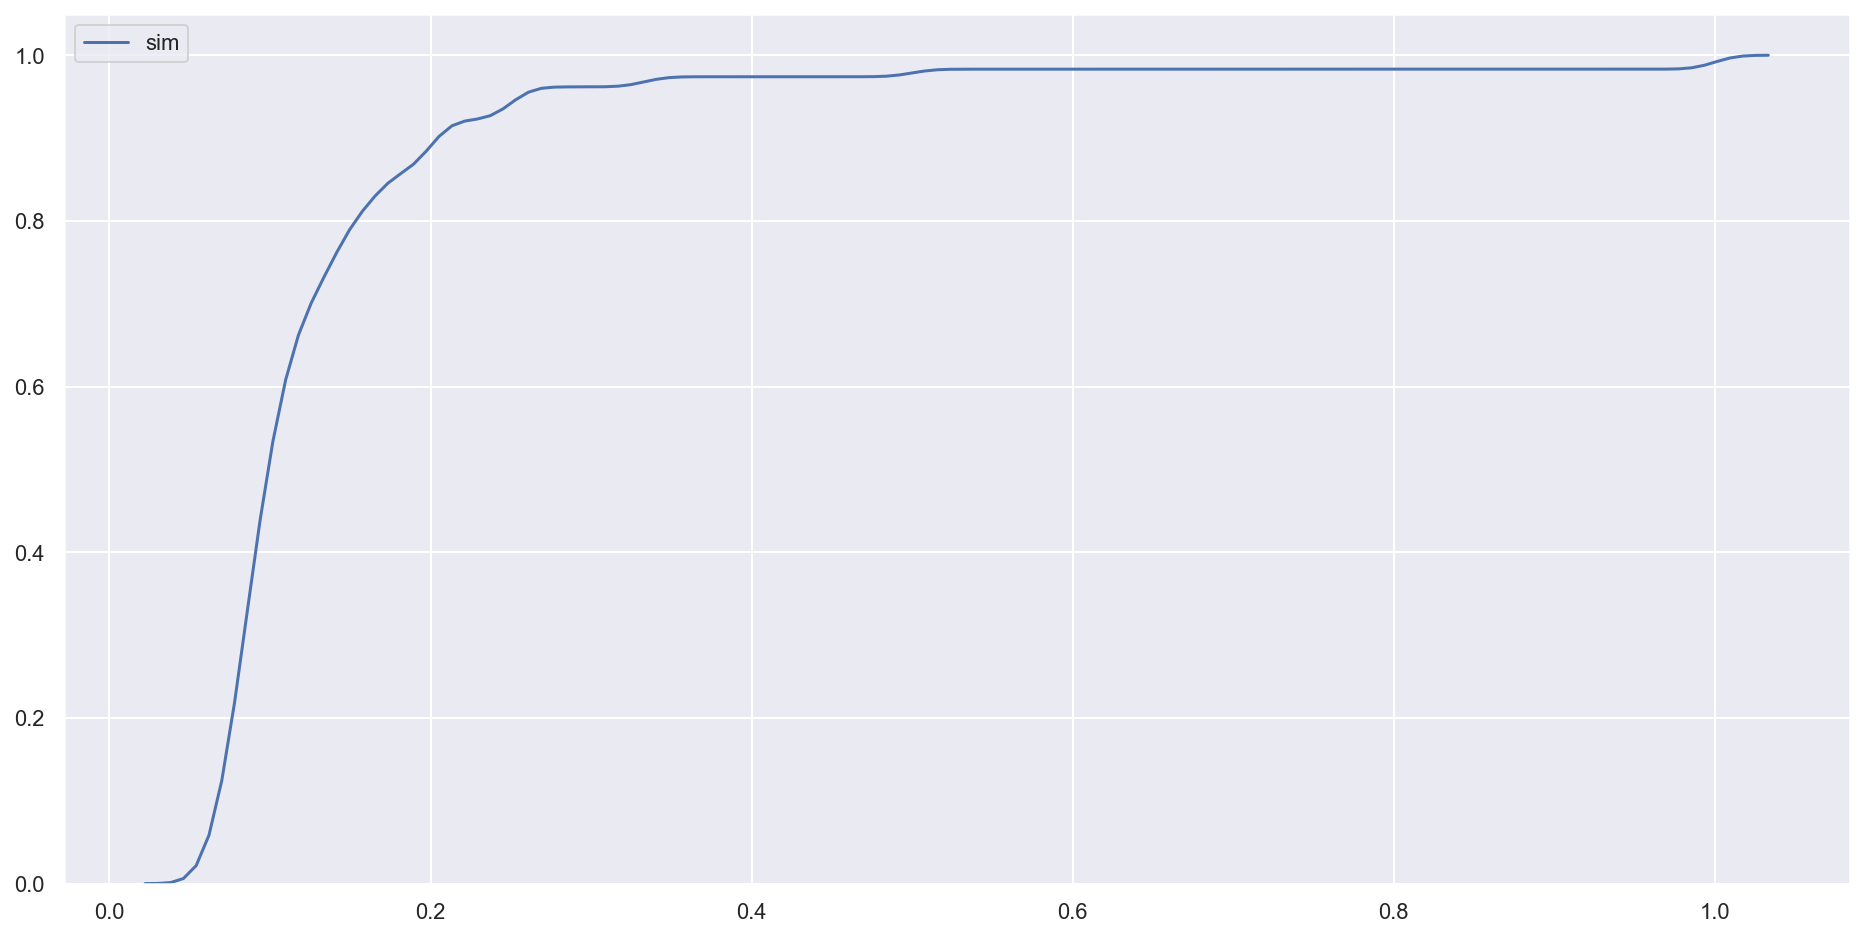

In [136]:
fig, ax = plt.subplots(1, 1, figsize=(16,8))
ax = sns.kdeplot(path_sim_df['sim'], cumulative=True, ax=ax)

### Could I infer a continuous probability distribution via kernel density estimation?

In [67]:
import statsmodels.api as sm

In [109]:
kde = sm.nonparametric.KDEUnivariate(path_sim_df['sim'])

In [110]:
kde.fit()

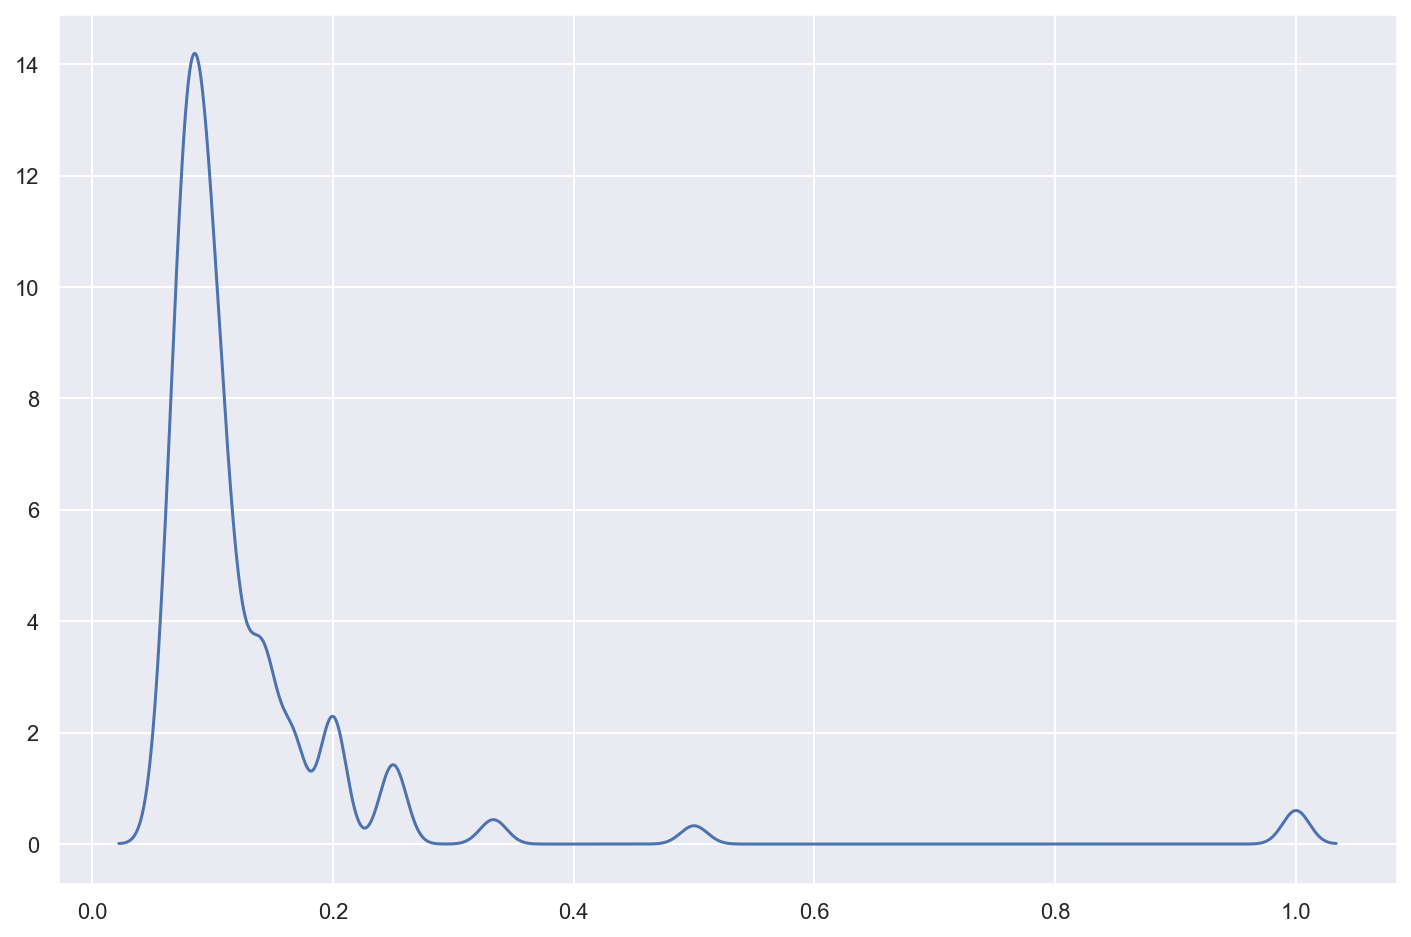

In [129]:
plt.plot(kde.support, kde.density);

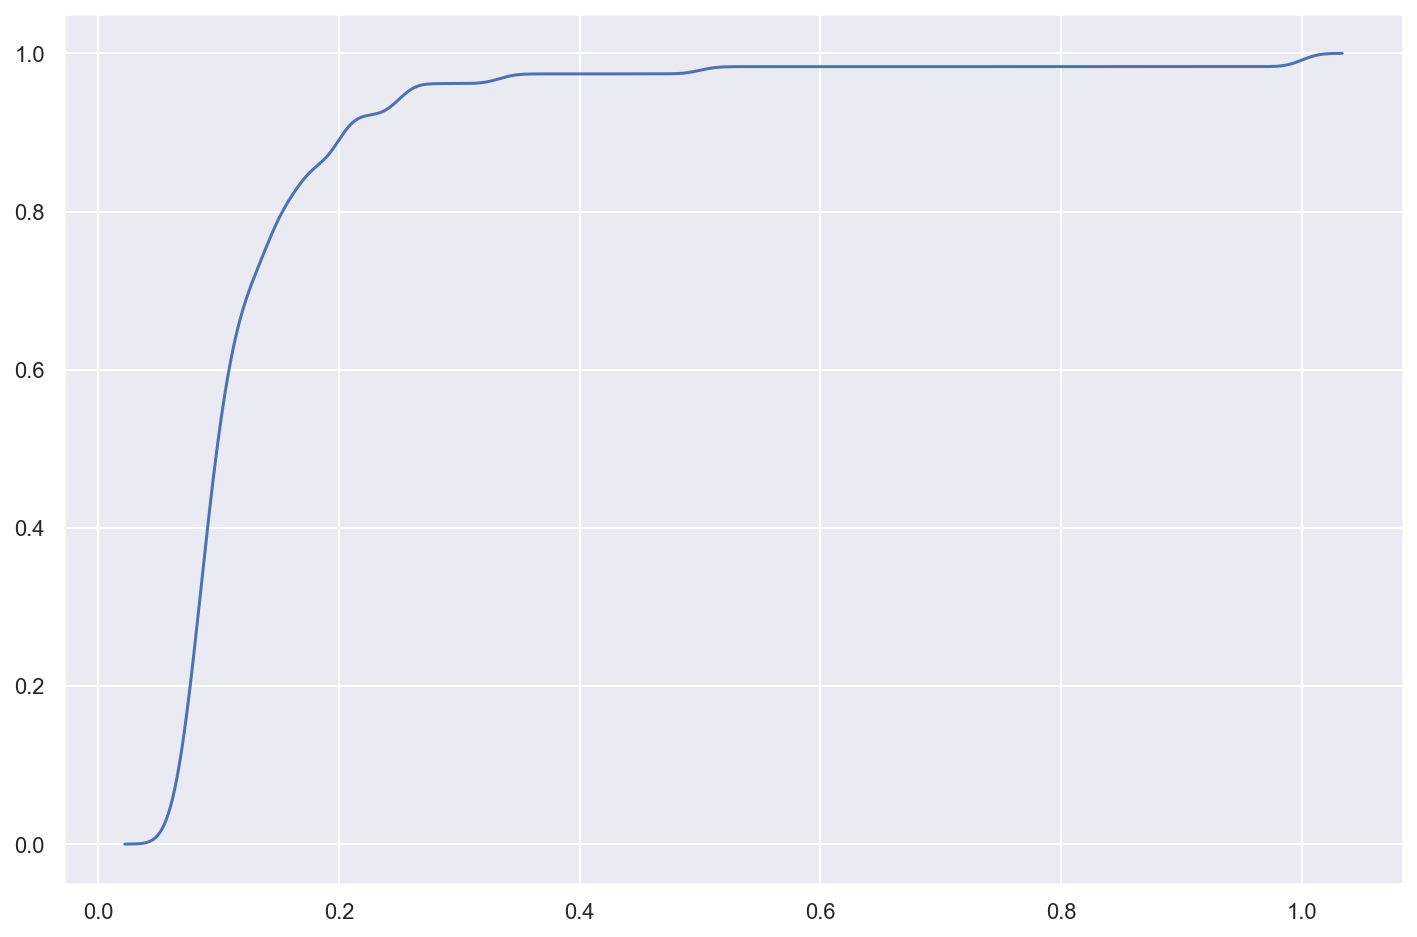

In [128]:
plt.plot(kde.support, kde.cdf);

`scipy.stats` approach:

In [137]:
from scipy import stats

In [138]:
scipy_kde = stats.gaussian_kde(path_sim_df['sim'])

In [145]:
scipy_kde.integrate_box_1d(0.0, 0.2)

0.8787407726422389

In [149]:
scipy_kde.evaluate([0.0,0.1,0.2])

array([0.30264761, 8.28287333, 1.56766463])

### OK, I'll settle with `statsmodels` for computing the KDE and estimate the mean similarity score

I hope that my attempt above at estimating the probability density function of the similarity measures is sound and makes sense. Not sure. It is probably my first attempt at something like this. My main motivation was to **estimate the mean of the similarity scores** as a way of measuring the quality of the model. See below:

In [95]:
np.mean(kde.support*kde.density)

0.13148315403006633

In [132]:
path_sim_df['sim'].mean(), path_sim_df['sim'].median()

(0.13302650635313645, 0.1)

How about the 0-1 loss?

In [123]:
np.mean(path_sim_df['y_pred']==path_sim_df['y_true'])

0.01680672268907563

In [125]:
path_sim_df.loc[path_sim_df['y_pred']==path_sim_df['y_true']]

,y_true,y_pred,sim
913,mourning.n.01,mourning.n.01,1.0
1017,satisfaction.n.01,satisfaction.n.01,1.0
547,easiness.n.01,easiness.n.01,1.0
999,satisfaction.n.01,satisfaction.n.01,1.0
1594,crave.v.01,crave.v.01,1.0
1376,disappointment.n.01,disappointment.n.01,1.0
1600,disappointment.n.01,disappointment.n.01,1.0
1509,boredom.n.01,boredom.n.01,1.0
1701,disappointment.n.01,disappointment.n.01,1.0
1381,disappointment.n.01,disappointment.n.01,1.0


In [126]:
len(path_sim_df.loc[path_sim_df['y_pred']==path_sim_df['y_true']])

22

In [127]:
len(path_sim_df.loc[path_sim_df['y_pred']==path_sim_df['y_true']]) / len(path_sim_df)

0.01680672268907563

## The WordNet Path Similarity on Other Examples

I am going old-school here to try to establish some baselines for a range of sense **semantically unrelated** to **synonymous**. Papers of relevance here are [1](https://www.tandfonline.com/doi/abs/10.1080/01690969108406936), [2](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=1209005), [3](https://dl.acm.org/doi/10.1145/365628.365657).

In [150]:
wordnet_search_like = \
   lambda lemma: \
      [
         (
            s.name(),
            s.definition(),
            s.examples(),
            [ (l.name(), l.key()) for l in s.lemmas() ]
         )
         for s in wn.synsets(lemma)
      ]

In [151]:
wordnet_search_like('cord')

[('cord.n.01',
  'a line made of twisted fibers or threads',
  ['the bundle was tied with a cord'],
  [('cord', 'cord%1:06:00::')]),
 ('cord.n.02',
  'a unit of amount of wood cut for burning; 128 cubic feet',
  [],
  [('cord', 'cord%1:23:00::')]),
 ('cord.n.03',
  'a light insulated conductor for household use',
  [],
  [('cord', 'cord%1:06:02::'), ('electric_cord', 'electric_cord%1:06:00::')]),
 ('cord.n.04',
  'a cut pile fabric with vertical ribs; usually made of cotton',
  [],
  [('cord', 'cord%1:06:01::'), ('corduroy', 'corduroy%1:06:00::')]),
 ('cord.v.01',
  'stack in cords',
  ['cord firewood'],
  [('cord', 'cord%2:35:00::')]),
 ('cord.v.02', 'bind or tie with a cord', [], [('cord', 'cord%2:35:01::')])]

In [159]:
synset_ids = [ 'cord.n.01', 'cushion.n.03', 'string.n.01', 'jewel.n.01', 'glass.n.01', 'pillow.n.01']
senses_to_compare = [ wn.synset(sid) for sid in synset_ids ]

In [168]:
from itertools import combinations

In [171]:
cc_df = pd.DataFrame([
    (s1.name(), s2.name(), s1.path_similarity(s2))
    for s1, s2 in combinations(senses_to_compare, 2)
], columns=['s1', 's2', 'sim'])

In [172]:
cc_df.sort_values('sim')

,s1,s2,sim
12,jewel.n.01,glass.n.01,0.090909
10,string.n.01,glass.n.01,0.100000
14,glass.n.01,pillow.n.01,0.100000
3,cord.n.01,glass.n.01,0.111111
7,cushion.n.03,glass.n.01,0.111111
9,string.n.01,jewel.n.01,0.125000
13,jewel.n.01,pillow.n.01,0.125000
2,cord.n.01,jewel.n.01,0.142857
6,cushion.n.03,jewel.n.01,0.142857
11,string.n.01,pillow.n.01,0.142857
